# Click "Edit App" to see the code

In [1]:
# python packages
from sys import stdout
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

In [2]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# Define the figure's parameters
size=28
figureParameters = {'figure.figsize' : (12,8),
                    'legend.fontsize': size*0.7,
                    'axes.labelsize' : size,
                    'axes.titlesize' : size,
                    'xtick.labelsize': size*0.8,
                    'ytick.labelsize': size*0.8,
                    'xtick.direction': "in",
                    'ytick.direction': "in",
                    'axes.linewidth' : 3,
                    'axes.titlepad'  : 25}

def prettyTicks(ax):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(0.01))
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='minor', length=6, width=3, color='black')
    ax.tick_params(which='major', length=12, width=3, color='black')

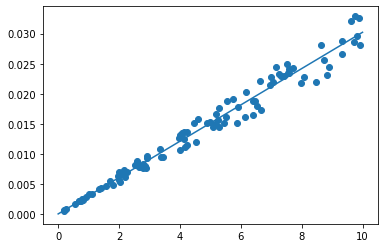

In [3]:
# Import the data
data = pd.read_csv("LB.csv")
data.columns = ("X","Y")
nval = len(data.index)

# fit the data with a line
def lline(x,m,q):
    return m*x + q
fitModel = Model(lline)
initialParameters = fitModel.make_params(m=1,q=1)
result = fitModel.fit(data["Y"], initialParameters, x=data["X"])

# Extract the best fitting parameters
mValue = result.best_values["m"]
qValue = result.best_values["q"]

# Create an array with the best fittig line
xl = np.arange(0,11)
plotLine = lline(xl,mValue,qValue)

# Set the figure parameters
# prettyFigure()

# Create the figure with the data points and their fit
fig = plt.figure()
ax = fig.gca()
ax.scatter(data["X"], data["Y"])
ax.plot(xl,plotLine)

# Make the figure
plt.show()

# Save the figure to file
# plt.savefig("figure.png")

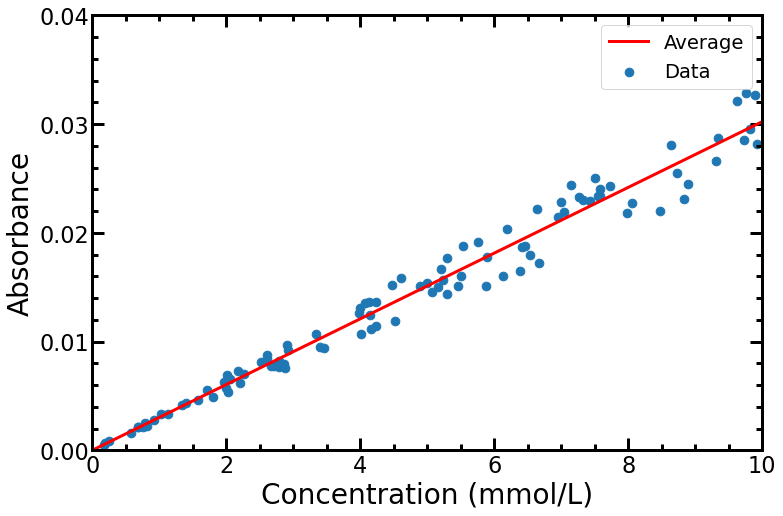

In [4]:
# Set figure parameters
plt.rcParams.update(figureParameters)

# Create a new figure
fig2 = plt.figure()
ax = fig2.gca()

# Add data
ax.scatter(data["X"], data["Y"], label="Data", s=75)
ax.plot(xl,plotLine, color='red', lw=3, label="Average")

# Set the axes labels
ax.set(xlabel="Concentration (mmol/L)")
ax.set(ylabel="Absorbance")

# Set the limits of the axes
plt.xlim([0,10])
plt.ylim([0,0.04])

# Make pretty tick marks
prettyTicks(ax)

ax.legend()
plt.show()